# OmniCal Metrics Example Notebook

How to run and use omnical metrics.

There are currently two main metrics:

1.
The standard deviation of each antenna's chi-square must be roughly the same as all others. If one deviates too strongly (e.g., by a z-score of more than 4) then the solution is deemed bad.

2.
A gain phase standard deviation per antenna, which looks to quantify phase variability across frequency. *Needs a firstcal file.*

bonus:

Gain phase histogram plots, and complex gain delay spectra. Currently only plots available: no hard metric is supplied. *Needs a firstcal file.*

**At the bottom:** how to run `omnical_metrics` via the command line script.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import hera_qm as hqm
from hera_qm.data import DATA_PATH
import os

Supplying `run_metrics()` with a firstcal calfits file as `fcfiles` means it will run metrics comparing omnical gain solutions against firstcal gain solutions. It outputs an `OrderedDict` with keys for polarization. Each polarization key will yield another `OrderedDict` with the metrics for that polarization.

`cut_edges` means it will cut the edge of the bandpass before running metrics.

`phs_std_cut` is a cut on the standard deviation of the phase solutions in radians across the file.

`chisq_std_zscore_cut` is a "sigma" level tolerance for the standard deviation of the chi-square fluctations per-antenna across the file.

## Load a really bad *.omni.calfits file, run metrics, make plots
---

This file includes two dead antennas, 81 & 22, which is an unlikely situation b/c `Ant_Metrics` and `FirstCal_Metrics` should pick up on this beforehand.

In [2]:
omni_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.reallybad.omni.calfits")
fc_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.reallybad.first.calfits")

OM = hqm.omnical_metrics.OmniCal_Metrics(omni_file)
full_metrics = OM.run_metrics(fcfiles=fc_file, cut_edges=True, phs_std_cut=0.3, chisq_std_zscore_cut=4.0)

In [3]:
# print metrics keys
print "full_metrics keys:"
print full_metrics.keys()
print ""
print "full_metrics['XX'] keys:"
print full_metrics['XX'].keys()
print ""
print "full_metrics['XX']['chisq_tot_avg'] value:"
print full_metrics['XX']['chisq_tot_avg']

full_metrics keys:
['XX']

full_metrics['XX'] keys:
['chisq_avg', 'chisq_tot_avg', 'chisq_ant_avg', 'chisq_ant_std', 'chisq_ant_std_loc', 'chisq_ant_std_scale', 'chisq_ant_std_zscore', 'chisq_ant_std_zscore_max', 'chisq_std_zscore_cut', 'chisq_good_sol', 'freqs', 'Nfreqs', 'cut_edges', 'Ncut', 'band', 'ant_array', 'jones', 'pol', 'ant_pol', 'times', 'Ntimes', 'Nants', 'version', 'history', 'filename', 'filestem', 'filedir', 'ant_gain_fft', 'ant_gain_dly', 'ant_phs_std', 'ant_phs_std_max', 'ant_phs_std_good_sol', 'phs_std_cut', 'ant_phs_std_per_time', 'ant_phs_hists', 'ant_phs_hist_bins']

full_metrics['XX']['chisq_tot_avg'] value:
0.308401107788


### Look at metrics

You can use the `plot_` routines associated with `omnical_metrics` to visualize the metrics. They require one of the nested `metrics` dictionary inside of `full_metrics`.

For the plot below, we can see the dead antenna 81 has a large chi-square variation from the others, marking the entire solution as bad.

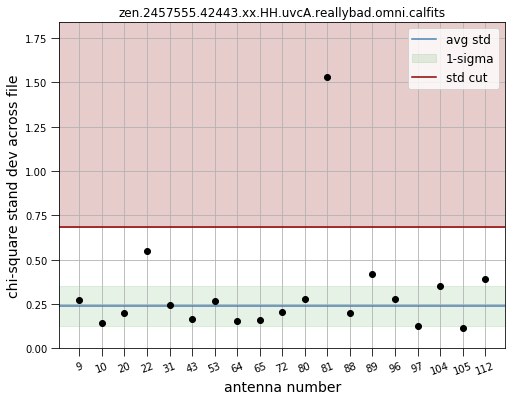

In [4]:
# Look at Chi Square Standard Deviations
hqm.omnical_metrics.plot_chisq_metric(full_metrics['XX'])

### Look at phase stand dev metric

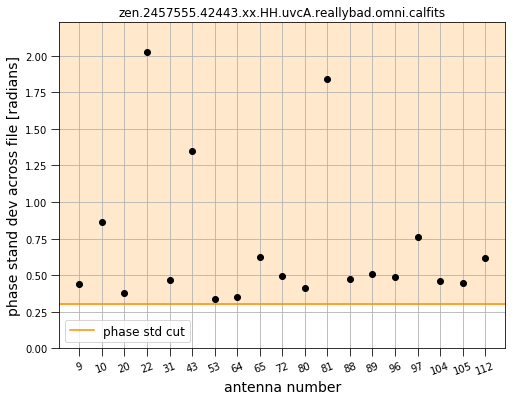

In [5]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='std')

### print at metric determinations

both metrics find the solution to be bad

In [6]:
print full_metrics['XX']['chisq_good_sol']
print full_metrics['XX']['ant_phs_std_good_sol']

False
False


### further inspect data

We can also visualize time-average chi-square, the amplitude and phase of the gain solutions, gain phase histograms and complex gain delay spectra. Some of these plotting routines are attached to the `OM` class and only have keyword arguments, while others are attached to the `omnical_metrics` module. This is done because some rely on data that isn't written to the `.json` file, because it comes straight from the `.omni.calfits` file.

For the case of a massive failure, it can be easy to see why the solution was marked bad by the metrics (e.g. gain phase plots below).

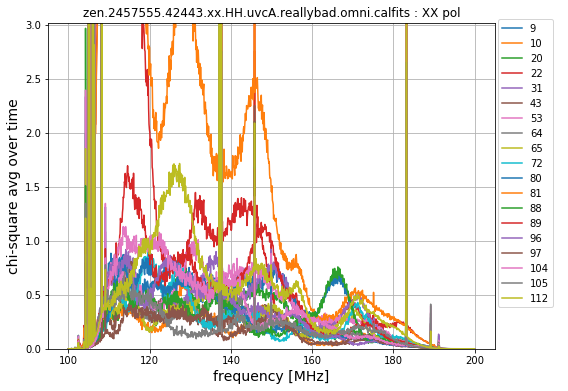

In [7]:
# time-average chi-square per antenna
OM.plot_chisq_tavg()

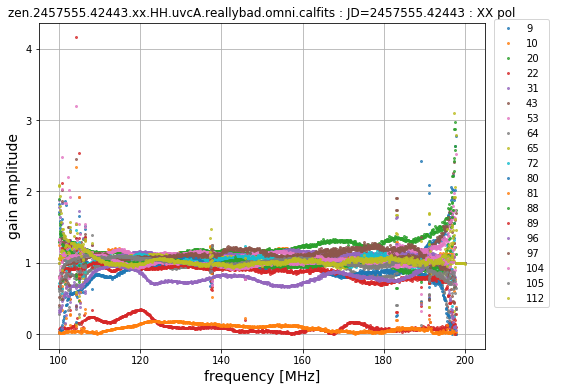

In [8]:
# gain amplitude at a given time
OM.plot_gains(plot_type='amp')

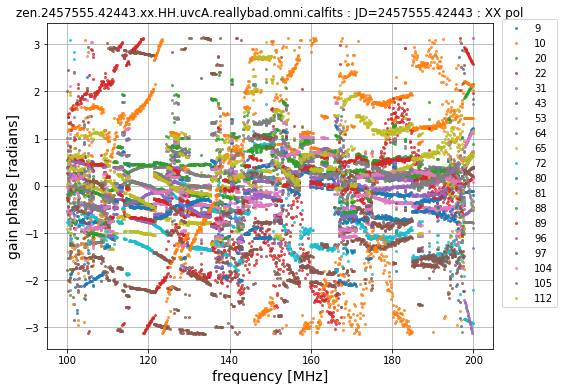

In [9]:
# plot firstcal-subtracted gain phase at a given time
OM.plot_gains(plot_type='phs', divide_fc=True)

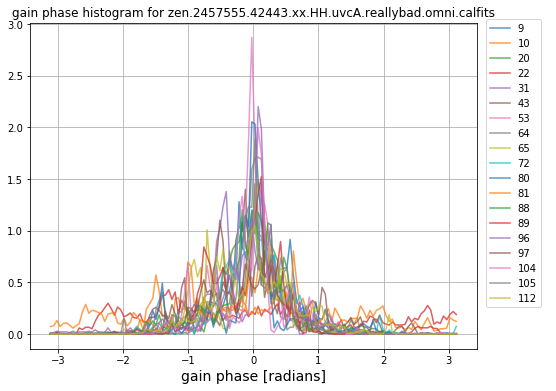

In [10]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='hist')

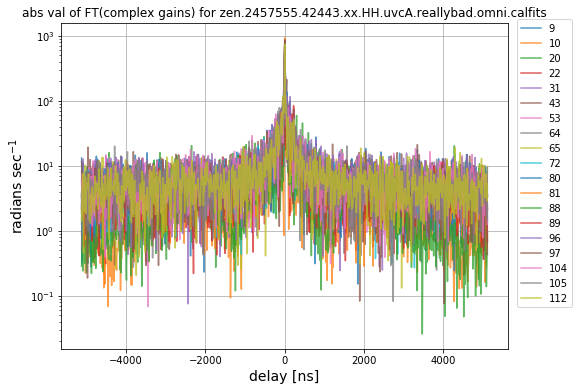

In [11]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='ft')

## Load a bad *.omni.calfits file

We will go through the same routines with a better, but arguably still *bad* omnical solution.

In [12]:
omni_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.bad.omni.calfits")
fc_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.first.calfits")

OM = hqm.omnical_metrics.OmniCal_Metrics(omni_file)
full_metrics = OM.run_metrics(fcfiles=fc_file, cut_edges=True, phs_std_cut=0.3, chisq_std_zscore_cut=4.0)

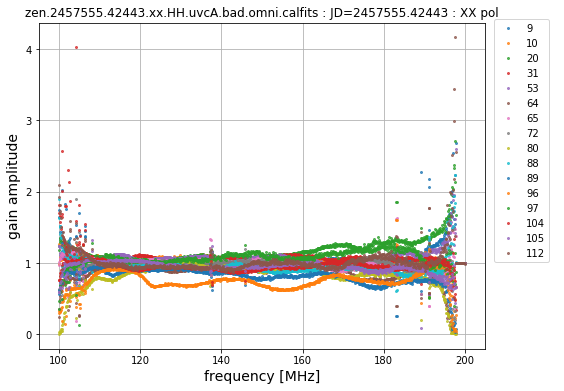

In [13]:
# gain amplitude at a given time
OM.plot_gains(plot_type='amp')

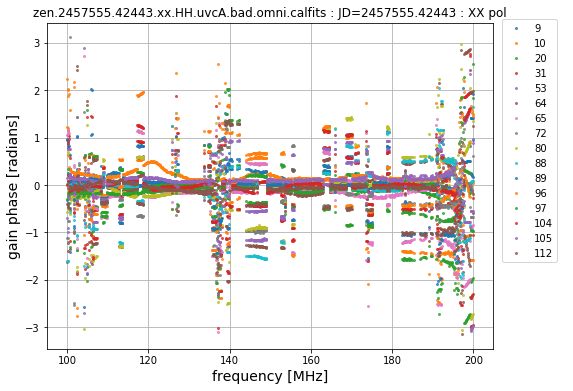

In [14]:
# plot firstcal-subtracted gain phase at a given time
OM.plot_gains(plot_type='phs', divide_fc=True)

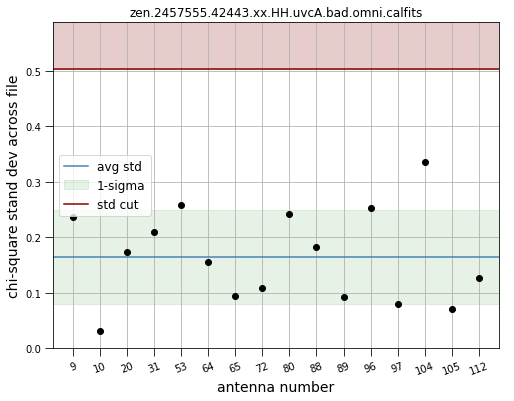

In [15]:
# Look at Chi Square Standard Deviations
hqm.omnical_metrics.plot_chisq_metric(full_metrics['XX'])

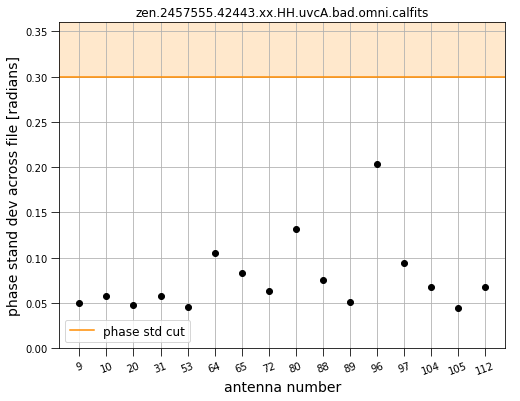

In [16]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='std')

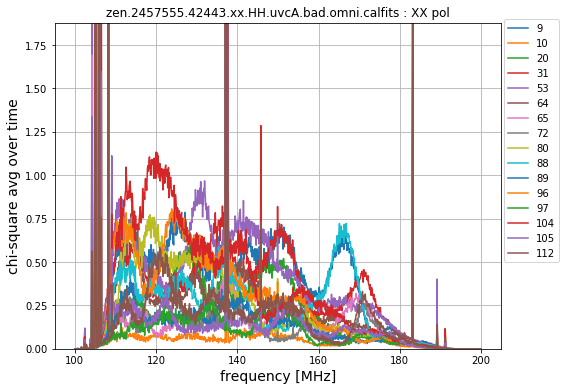

In [17]:
# time-average chi-square per antenna
OM.plot_chisq_tavg()

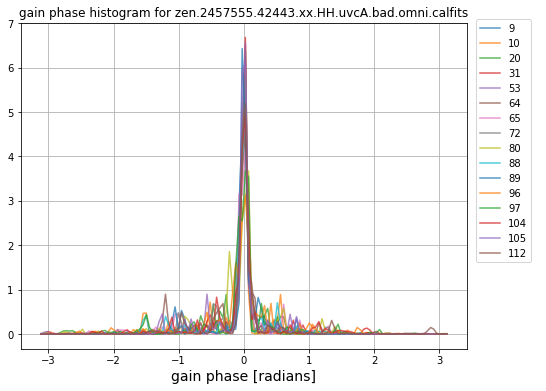

In [18]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='hist')

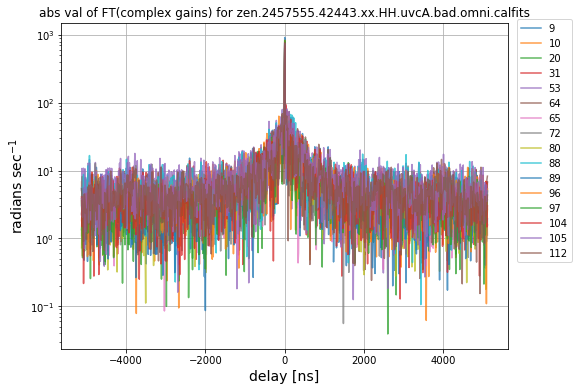

In [19]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='ft')

In [20]:
print full_metrics['XX']['chisq_good_sol']
print full_metrics['XX']['ant_phs_std_good_sol']

True
True


You will notice we don't yet have a hard metric to automatically flag the particular failure mode above. However, the failure is apparent in inspection of the phase histogram and delay spectra plots (as compared to a good solution below). We are currently working on turning this data into a hard metric.

## Look at good *.omni.calfits solution

In [21]:
omni_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.good.omni.calfits")
fc_file = os.path.join(DATA_PATH, "zen.2457555.42443.xx.HH.uvcA.first.calfits")

OM = hqm.omnical_metrics.OmniCal_Metrics(omni_file)
full_metrics = OM.run_metrics(fcfiles=fc_file, cut_edges=True, phs_std_cut=0.3, chisq_std_zscore_cut=4.0)

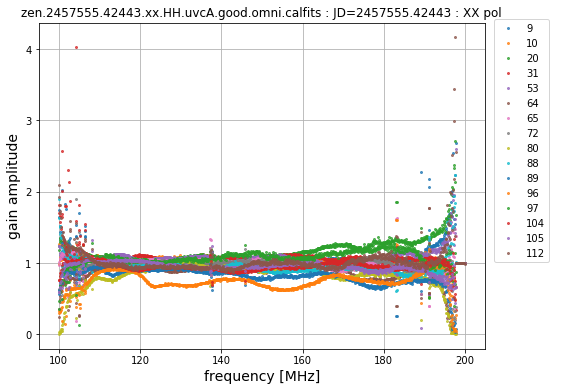

In [22]:
# gain amplitude at a given time
OM.plot_gains(plot_type='amp')

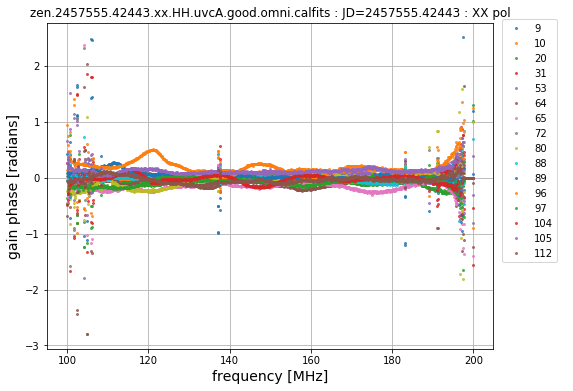

In [23]:
# plot firstcal-subtracted gain phase at a given time
OM.plot_gains(plot_type='phs', divide_fc=True)

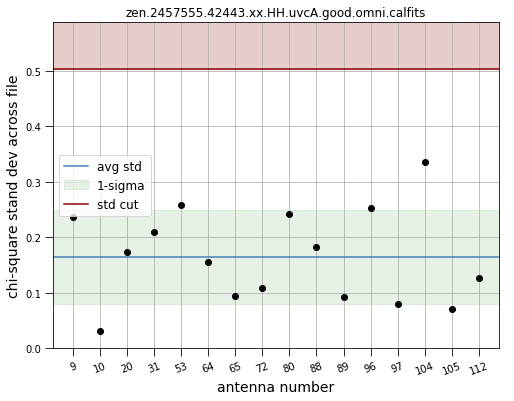

In [24]:
# Look at Chi Square Standard Deviations
hqm.omnical_metrics.plot_chisq_metric(full_metrics['XX'])

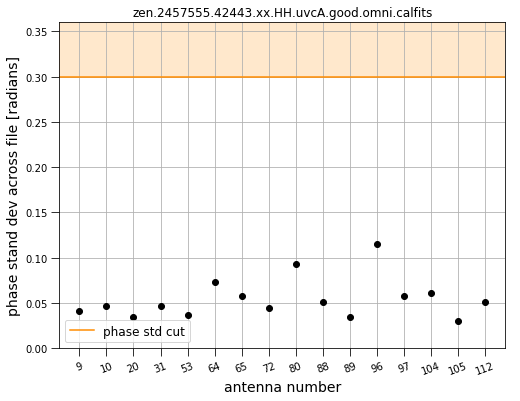

In [25]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='std')

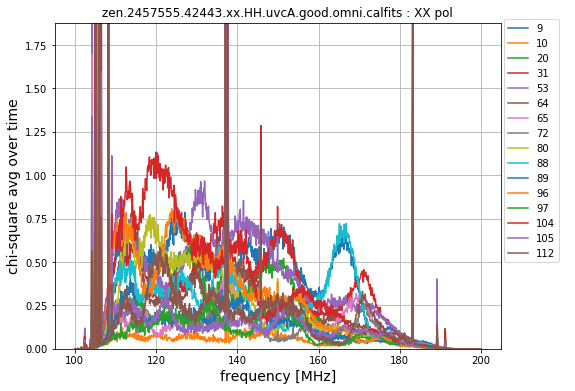

In [26]:
# time-average chi-square per antenna
OM.plot_chisq_tavg()

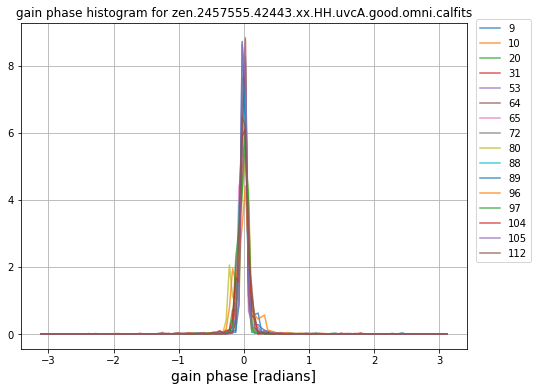

In [27]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='hist')

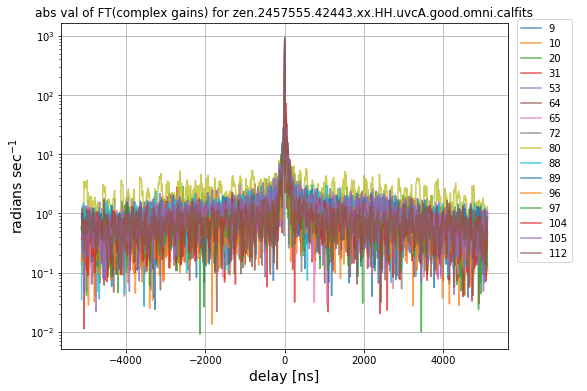

In [28]:
hqm.omnical_metrics.plot_phs_metric(full_metrics['XX'], plot_type='ft')

In [29]:
print full_metrics['XX']['chisq_good_sol']
print full_metrics['XX']['ant_phs_std_good_sol']

True
True


## Command Line Usage

The bash command line function `omnical_metrics_run.py` can be used to run omnical metrics from the command line. The arguments are listed in the cellbelow.

Given the directory structure below:
```bash
./zen.xx.HH.uvc.omni.calfits
./zen.xx.HH.uvc.first.calfits
```
a standard call to `omnical_metrics_run.py` working on a single polarization (`xx`) would look something like:
```bash
omnical_metrics_run.py --fc_files=./zen.xx.HH.uvc.first.calfits ./zen.xx.HH.uvc.omni.calfits
```

For a `.omni.calfits` file with multiple polarizations, you need to feed each firstcal file as a comma-separated list. For a directory structure as
```bash
./zen.HH.uvc.omni.calfits
./zen.xx.HH.uvc.first.calfits
./zen.yy.HH.uvc.first.calfits
```
with `./zen.HH.uvc.omni.calfits` containing `yy` and `xx` omnical solutions (in that order), a metrics call would look like
```bash
omnical_metrics_run.py --fc_files=./zen.yy.HH.uvc.first.calfits,./zen.xx.HH.uvc.first.calfits ./zen.HH.uvc.omni.calfits
```

In [30]:
%%bash
omnical_metrics_run.py -h

usage: omnical_metrics.py [-h] [--fc_files fc_files] [--no_bandcut]
                          [--phs_std_cut PHS_STD_CUT]
                          [--chisq_std_zscore_cut CHISQ_STD_ZSCORE_CUT]
                          [--make_plots] [--extension EXTENSION]
                          [--metrics_path METRICS_PATH]
                          [files [files ...]]

positional arguments:
  files                 *.omni.calfits files for which to calculate
                        omnical_metrics.

optional arguments:
  -h, --help            show this help message and exit
  --fc_files fc_files   [optional] *.first.calfits files of firstcal solutions
                        to perform omni-firstcal comparison metrics. If
                        multiple pols exist in a single *.omni.calfits file,
                        feed .pol.first.calfits fcfiles as comma-delimited. If
                        operating on multiple .omni.calfits files, feed
                        separate comma-delimited fc